<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:
Amirmohammad Marshalpirgheybi
**Student ID**:
98109815
# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [28]:
X, Y = None, None

### START CODE HERE ###
df = pd.read_csv("q1.csv")
df.head()
X = df.iloc[:,0:8].to_numpy()
Y = df.iloc[:,8].to_numpy()
Y = Y.reshape((Y.shape[0],1))
### END CODE HERE ###

print(X.shape)
print(Y.shape)

(768, 8)
(768, 1)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:
Normalization avoids raw data and various problems of datasets by creating new values and maintaining general distribution as well as a ratio in data. Further, it also improves the performance and accuracy of machine learning models using various techniques and algorithms. 

In [29]:
### START CODE HERE ###
mean_vector_x = X.mean(axis = 0)
std_vector_x = np.sqrt(X.var(axis = 0))
X = (X-mean_vector_x)/std_vector_x
mean_vector_y = Y.mean(axis = 0)
std_vector_y = np.sqrt(Y.var(axis = 0))
Y = (Y-mean_vector_y)/std_vector_y
### END CODE HERE ###

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [30]:
### START CODE HERE ###
X = np.concatenate([X , np.ones(Y.shape)],axis = 1)
### END CODE HERE ###

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [31]:
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None
  ### START CODE HERE ###
  loss = 1/m*((X @ w - Y)**2).sum(axis = 0)
  ### END CODE HERE ###
  return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer:
$$
w^* = (X^T X)^{-1}X^Ty
$$

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [32]:
def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  ### START CODE HERE ###
  w = np.linalg.pinv(X.T @ X) @ X.T @ Y
  ### END CODE HERE ###
  return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [33]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is [0.08379792]


## Training Model Using Gradient Descent



Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:\
The answer would be:
$$
(\nabla \mathcal{L}(\mathbf{w}))_j = \frac{2}{m}\sum_{i=1}^{m}(\mathbf{w}^T \mathbf{x}_i-y_i)x_{ij}
$$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [34]:
def gradient(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  grad = None
  ### START CODE HERE ###
  grad = X @ w - Y
  grad = 2/m * X.T @ (X @ w - Y)
  ### END CODE HERE ###
  return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [35]:
def gradient_descent(X, Y, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w, loss_history = None, None 
  ### START CODE HERE ###
  loss_history = np.zeros((num_iter,1))
  w = np.random.randn(n,1)
  for k in range(num_iter):
    w = w - alpha * gradient(X,Y,w)
    loss_history[k,0] = loss(X,Y,w)

  ### END CODE HERE ###
  return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**:
As you can see, if the learning rate is too much small, the convergence rate would be small but the loss is going to decrease monotically. However if it's too large, the convergence rate would be large but on the other hand there's the possibility of a divergence of gradient descent. Hence, the best learning rate is the one in the middle of both these situation where you can see for example, that 0.1 and 0.2 are good choices.

Text(0.5, 1.0, 'The loss vs iter for gradient descent')

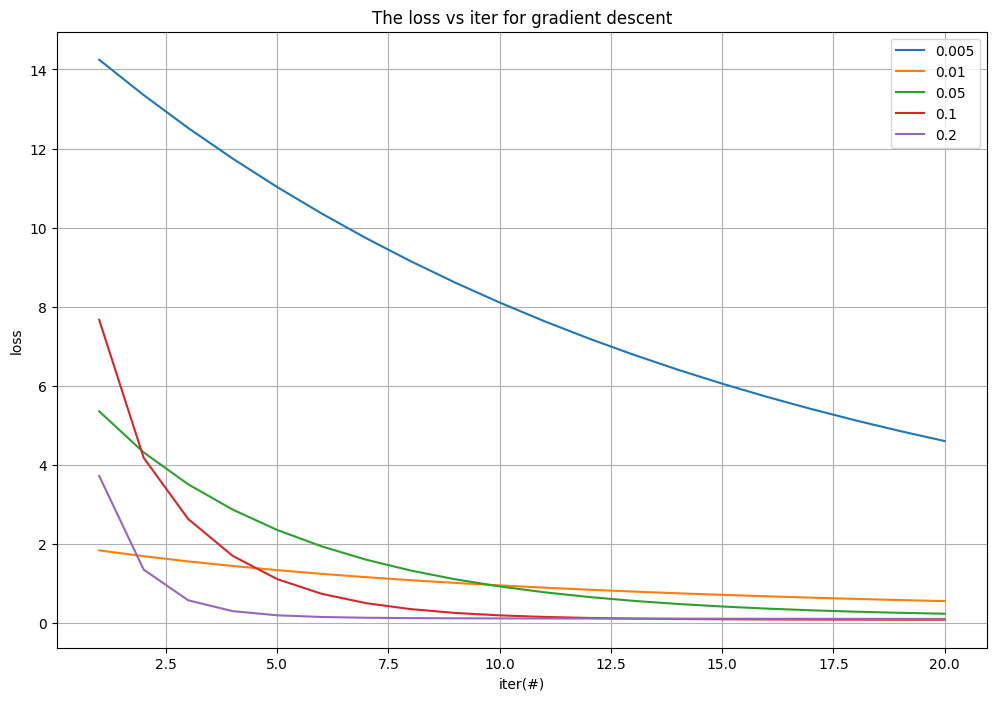

In [36]:
### START CODE HERE ###
learning_rate = np.array([0.005,0.01,0.05,0.1,0.2])
#learning_rate = np.array([0.1])
num_iter = 20
iteration = range(20)
iteration = np.array(iteration)
iteration = iteration + 1
plt.figure(figsize = (12,8))
for alpha in learning_rate:
  loss_history = None
  w , loss_history = gradient_descent(X, Y, alpha, num_iter)
  #print(loss_history)
  plt.plot(iteration , loss_history)
plt.legend(learning_rate)
plt.grid()
plt.xlabel("iter(#)")
plt.ylabel("loss")
plt.title("The loss vs iter for gradient descent")
### END CODE HERE ###

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**:
As you can see, the closed form solution would yield the best result in one go and it would be a perfect case for situations where $m \le n$ in the dataset. Now, it's true that the gradient descent method has some complexity in the choice of the learning rate, but when $n ≥ m $, the calculation of the inverse of $ X^T X$ would be computationally expensive compared to gradient descent. Hence, in these cases which is the usual one, we prefer to use the gradient descent method.

## (Additional Part) Stochastic Gradient Descent

When the number of data points becomes large, calculating the gradient becomes very complicated. In these circumstances, we use **Stochastic Gradient Descent**. In this algorithm, instead of using all of the data points to calculate the gradient, we use only a small number of them. We choose these small number of points randomly in each iteration. Implement this algorithm, and use it to calculate $w$, and then compare the result with the preceding parts.

In [41]:
def stochastic_gradient_descent(X, Y, k, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  k: number of data points used in each iteration
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  w, loss_history = None, None 
  ### START CODE HERE ###
  loss_history = np.zeros((num_iter,1))
  w = np.random.randn(n,1)
  for i in range(num_iter):
    index_vec = np.random.choice(m,k,replace=False)
    w = w - alpha * gradient(X[index_vec,:],Y[index_vec,:],w)
    loss_history[i,0] = loss(X,Y,w)
  ### END CODE HERE ###
  return w, loss_history

Text(0.5, 1.0, 'The loss vs iter for gradient descent')

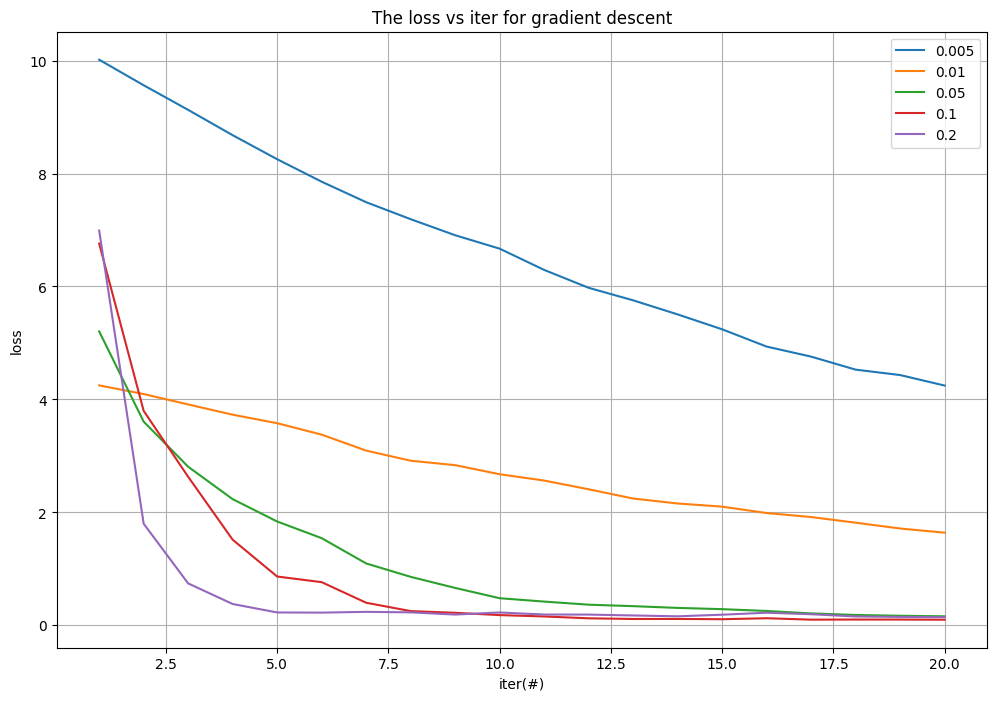

In [42]:
### START CODE HERE ###
learning_rate = np.array([0.005,0.01,0.05,0.1,0.2])
#learning_rate = np.array([0.1])
num_iter = 20
k = 20
iteration = range(20)
iteration = np.array(iteration)
iteration = iteration + 1
plt.figure(figsize = (12,8))
for alpha in learning_rate:
  loss_history = None
  w , loss_history = stochastic_gradient_descent(X, Y,k, alpha, num_iter)
  #print(loss_history)
  plt.plot(iteration , loss_history)
plt.legend(learning_rate)
plt.grid()
plt.xlabel("iter(#)")
plt.ylabel("loss")
plt.title("The loss vs iter for gradient descent")
### END CODE HERE ###

As you can see, the convergence rate of stochstic gradient descent is not as much as the regular one but on the other hand, it's computation complexity is much lower and the result is as much good as the regular gradient descent and hence, it would be a great idea to use this method for optimization of our parameters. 